In [58]:
import json
import datetime
import pandas as pd
import numpy as np
import requests
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib

In [6]:
r = requests.get("https://www.dph.illinois.gov/sitefiles/COVIDHospitalRegions.json?nocache=1")
hospitalization_json= r.text

data = json.loads(hospitalization_json)

In [14]:
history = data['HospitalUtilizationResults']
history[0]


{'reportDate': '2020-04-12',
 'TotalBeds': 29994,
 'TotalOpenBeds': 11559,
 'TotalInUseBedsNonCOVID': 14297,
 'TotalInUseBedsCOVID': 4138,
 'ICUBeds': 2991,
 'ICUOpenBeds': 954,
 'ICUInUseBedsNonCOVID': 878,
 'ICUInUseBedsCOVID': 1159,
 'VentilatorCapacity': 3079,
 'VentilatorAvailable': 1759,
 'VentilatorInUseNonCOVID': 520,
 'VentilatorInUseCOVID': 800}

In [42]:
cols = [ 'TotalBeds','TotalOpenBeds','TotalInUseBedsNonCOVID','TotalInUseBedsCOVID','ICUBeds','ICUOpenBeds', 'ICUInUseBedsNonCOVID','ICUInUseBedsCOVID','VentilatorCapacity','VentilatorAvailable','VentilatorInUseNonCOVID','VentilatorInUseCOVID']
table = {}
table['date'] = []
for column in cols:
    table[column] = []
    table[column+'_change'] = []
    table[column+'_change_7day'] = []
    table[column+'_change_14day'] = []
    table[column+'_7day'] = []
    table[column+'_14day'] = []



In [43]:
for day in history:
    table['date'].append(day['reportDate'])
    for column in cols:
        
        table[column].append(day[column])
        table[column+'_change'].append(0)
        table[column+'_change_7day'].append(0)
        table[column+'_change_14day'].append(0)
        table[column+'_7day'].append(0)
        table[column+'_14day'].append(0)


In [44]:
df = pd.DataFrame(table)
df['date'] = pd.to_datetime(df['date'])



In [46]:
for column in cols:
    df[column+'_change'] = df[column].diff(periods=1)


In [48]:
for column in cols:
    df[column+'_7day'] = df[column].rolling(window=7).mean()
    df[column+'_14day'] = df[column].rolling(window=14).mean()
    df[column+'_change_7day'] = df[column+'_change'].rolling(window=7).mean()
    df[column+'_change_14day'] = df[column+'_change'].rolling(window=14).mean()


In [49]:
df


,date,TotalBeds,TotalBeds_change,TotalBeds_change_7day,TotalBeds_change_14day,TotalBeds_7day,TotalBeds_14day,TotalOpenBeds,TotalOpenBeds_change,TotalOpenBeds_change_7day,...,VentilatorInUseNonCOVID_change_7day,VentilatorInUseNonCOVID_change_14day,VentilatorInUseNonCOVID_7day,VentilatorInUseNonCOVID_14day,VentilatorInUseCOVID,VentilatorInUseCOVID_change,VentilatorInUseCOVID_change_7day,VentilatorInUseCOVID_change_14day,VentilatorInUseCOVID_7day,VentilatorInUseCOVID_14day
0,2020-04-12,29994,NaN,NaN,NaN,NaN,NaN,11559,NaN,NaN,...,NaN,NaN,NaN,NaN,800,NaN,NaN,NaN,NaN,NaN
1,2020-04-13,30134,140.0,NaN,NaN,NaN,NaN,11098,-461.0,NaN,...,NaN,NaN,NaN,NaN,796,-4.0,NaN,NaN,NaN,NaN
2,2020-04-14,30178,44.0,NaN,NaN,NaN,NaN,11132,34.0,NaN,...,NaN,NaN,NaN,NaN,764,-32.0,NaN,NaN,NaN,NaN
3,2020-04-15,30322,144.0,NaN,NaN,NaN,NaN,11540,408.0,NaN,...,NaN,NaN,NaN,NaN,797,33.0,NaN,NaN,NaN,NaN
4,2020-04-16,30276,-46.0,NaN,NaN,NaN,NaN,11464,-76.0,NaN,...,NaN,NaN,NaN,NaN,777,-20.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2020-09-14,34624,14.0,-25.142857,-11.500000,34655.428571,34722.428571,13592,-107.0,-130.571429,...,-9.142857,-2.428571,1077.142857,1111.571429,144,13.0,1.571429,-0.142857,144.285714,143.285714
156,2020-09-15,34684,60.0,-8.857143,-7.071429,34646.571429,34715.357143,12467,-1125.0,-263.142857,...,2.142857,-3.428571,1079.285714,1108.142857,143,-1.0,1.428571,0.071429,145.714286,143.357143
157,2020-09-16,34698,14.0,-6.714286,-6.142857,34639.857143,34709.214286,12232,-235.0,-144.571429,...,0.285714,-10.285714,1079.571429,1097.857143,144,1.0,0.428571,0.000000,146.142857,143.357143
158,2020-09-17,34692,-6.0,9.000000,-6.785714,34648.857143,34702.428571,12098,-134.0,-88.428571,...,3.714286,-1.428571,1083.285714,1096.428571,149,5.0,-0.857143,-0.428571,145.285714,142.928571


In [117]:
df.to_csv('state_hospitalization.csv')

In [128]:
df = pd.read_csv('state_hospitalization.csv', index_col=1, parse_dates=True)
df = df.set_index('date')

KeyError: "None of ['date'] are in the columns"

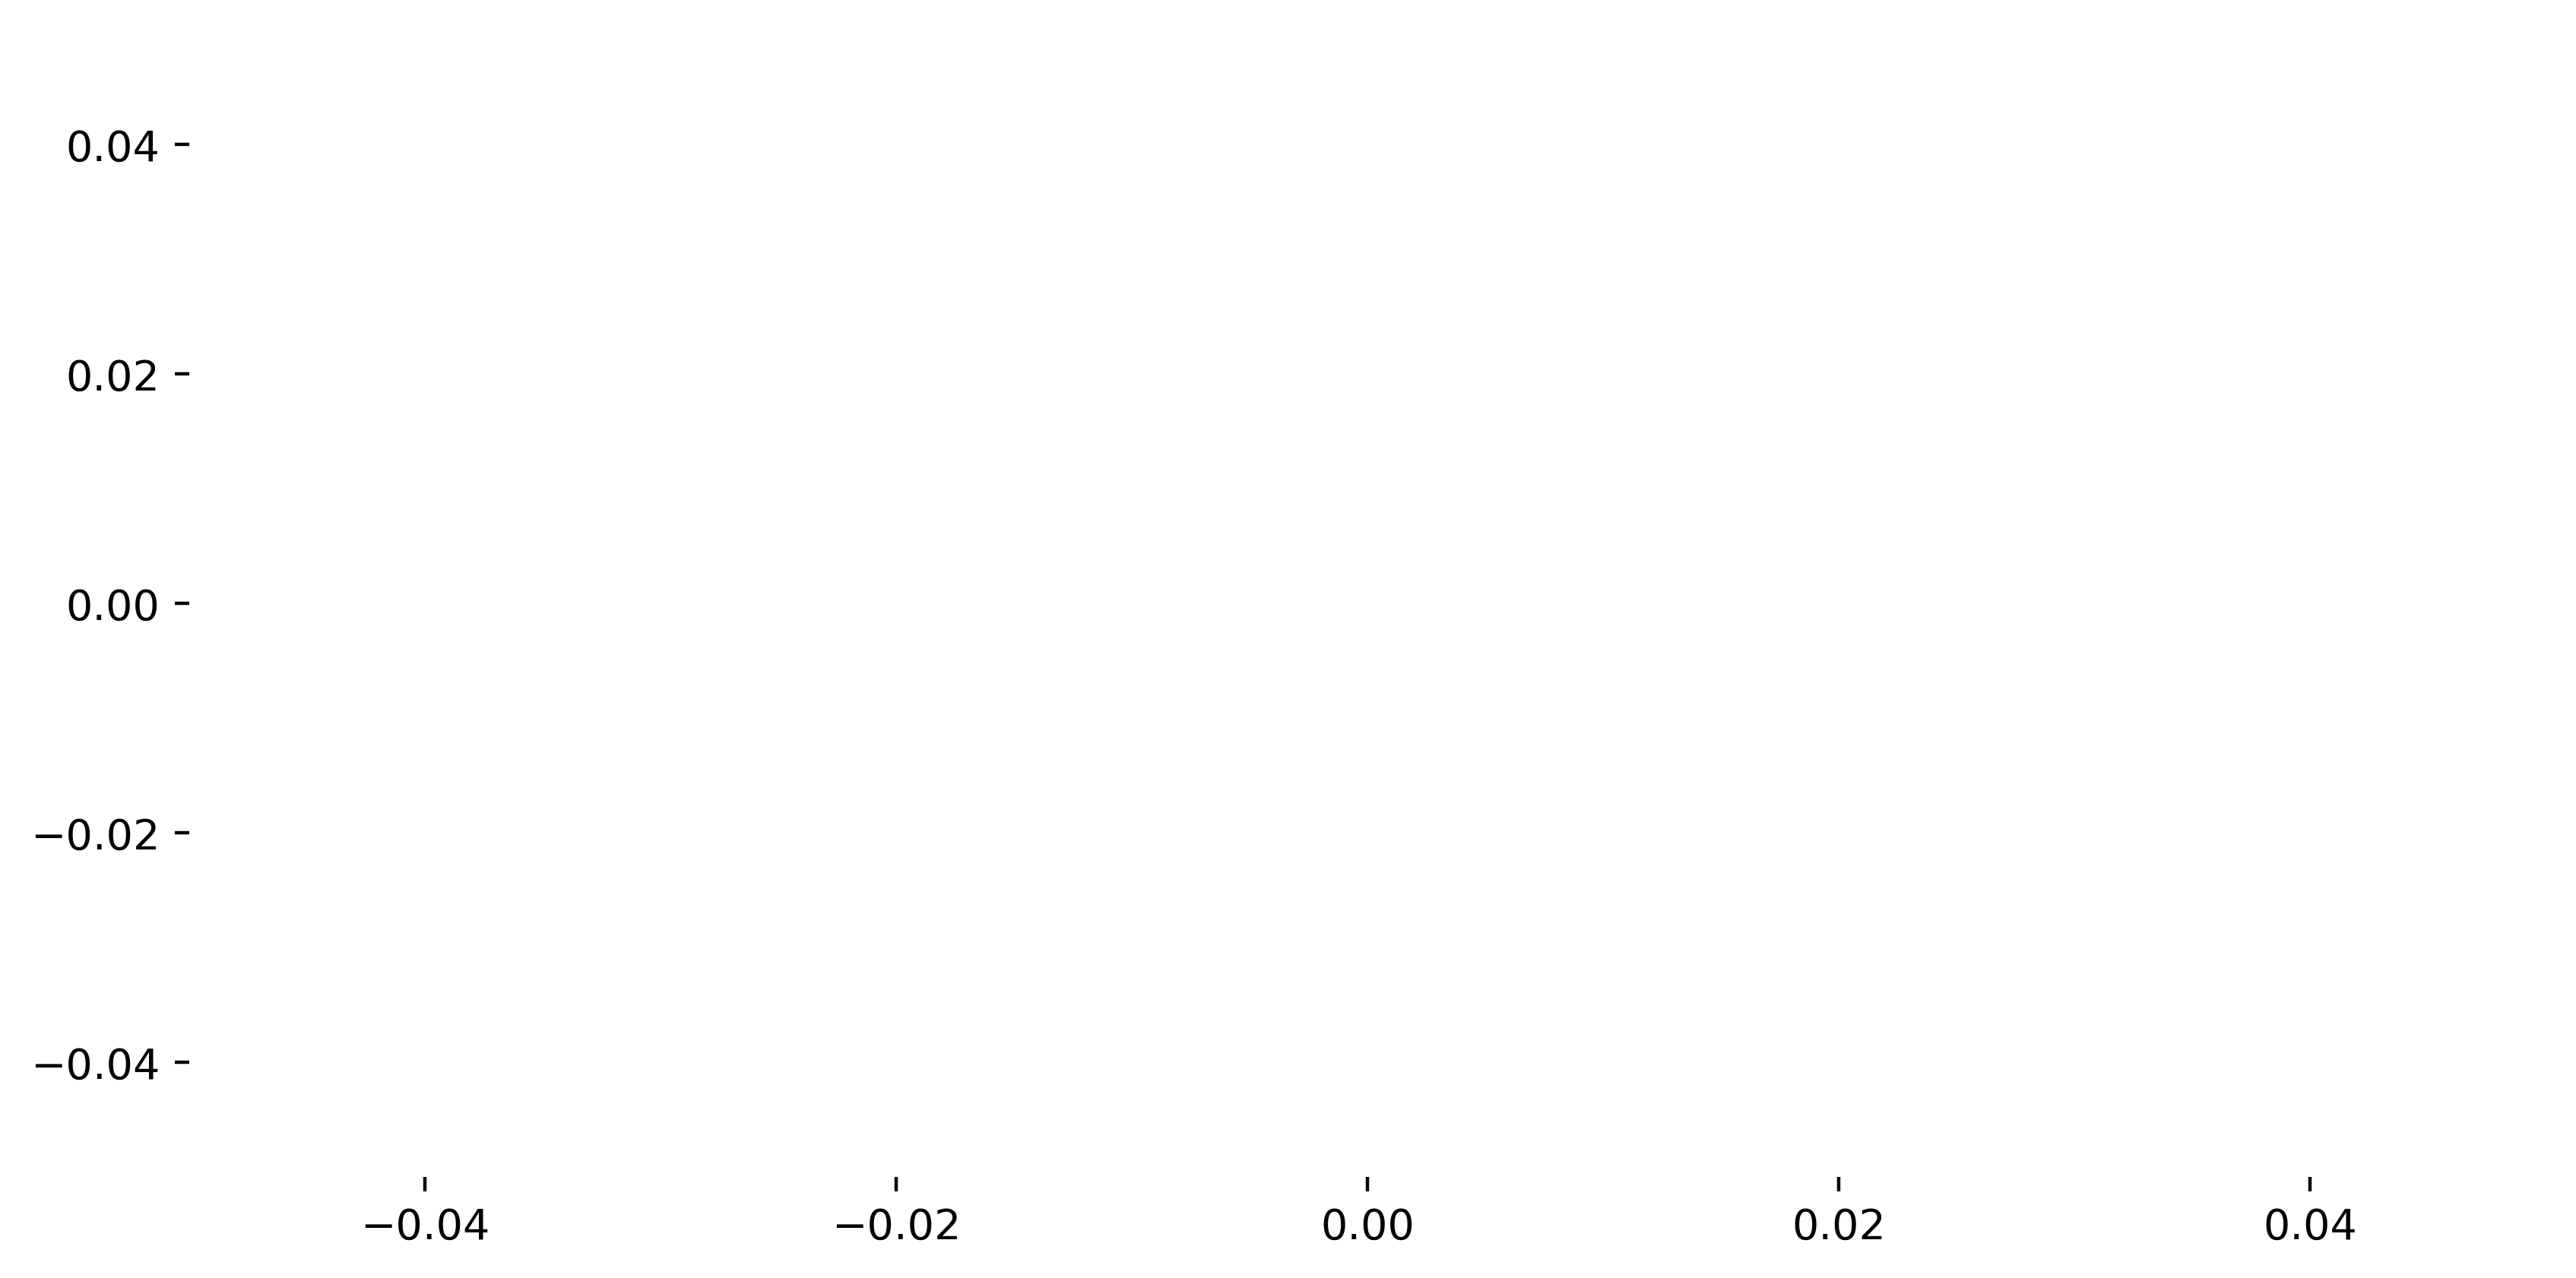

In [59]:
plt.figure(figsize=(10, 5), dpi=400)
plt.box(on=None)
plt.margins(0)



In [116]:
df.tail(1)['VentilatorInUseCOVID_7day']

159    141.142857
Name: VentilatorInUseCOVID_7day, dtype: float64

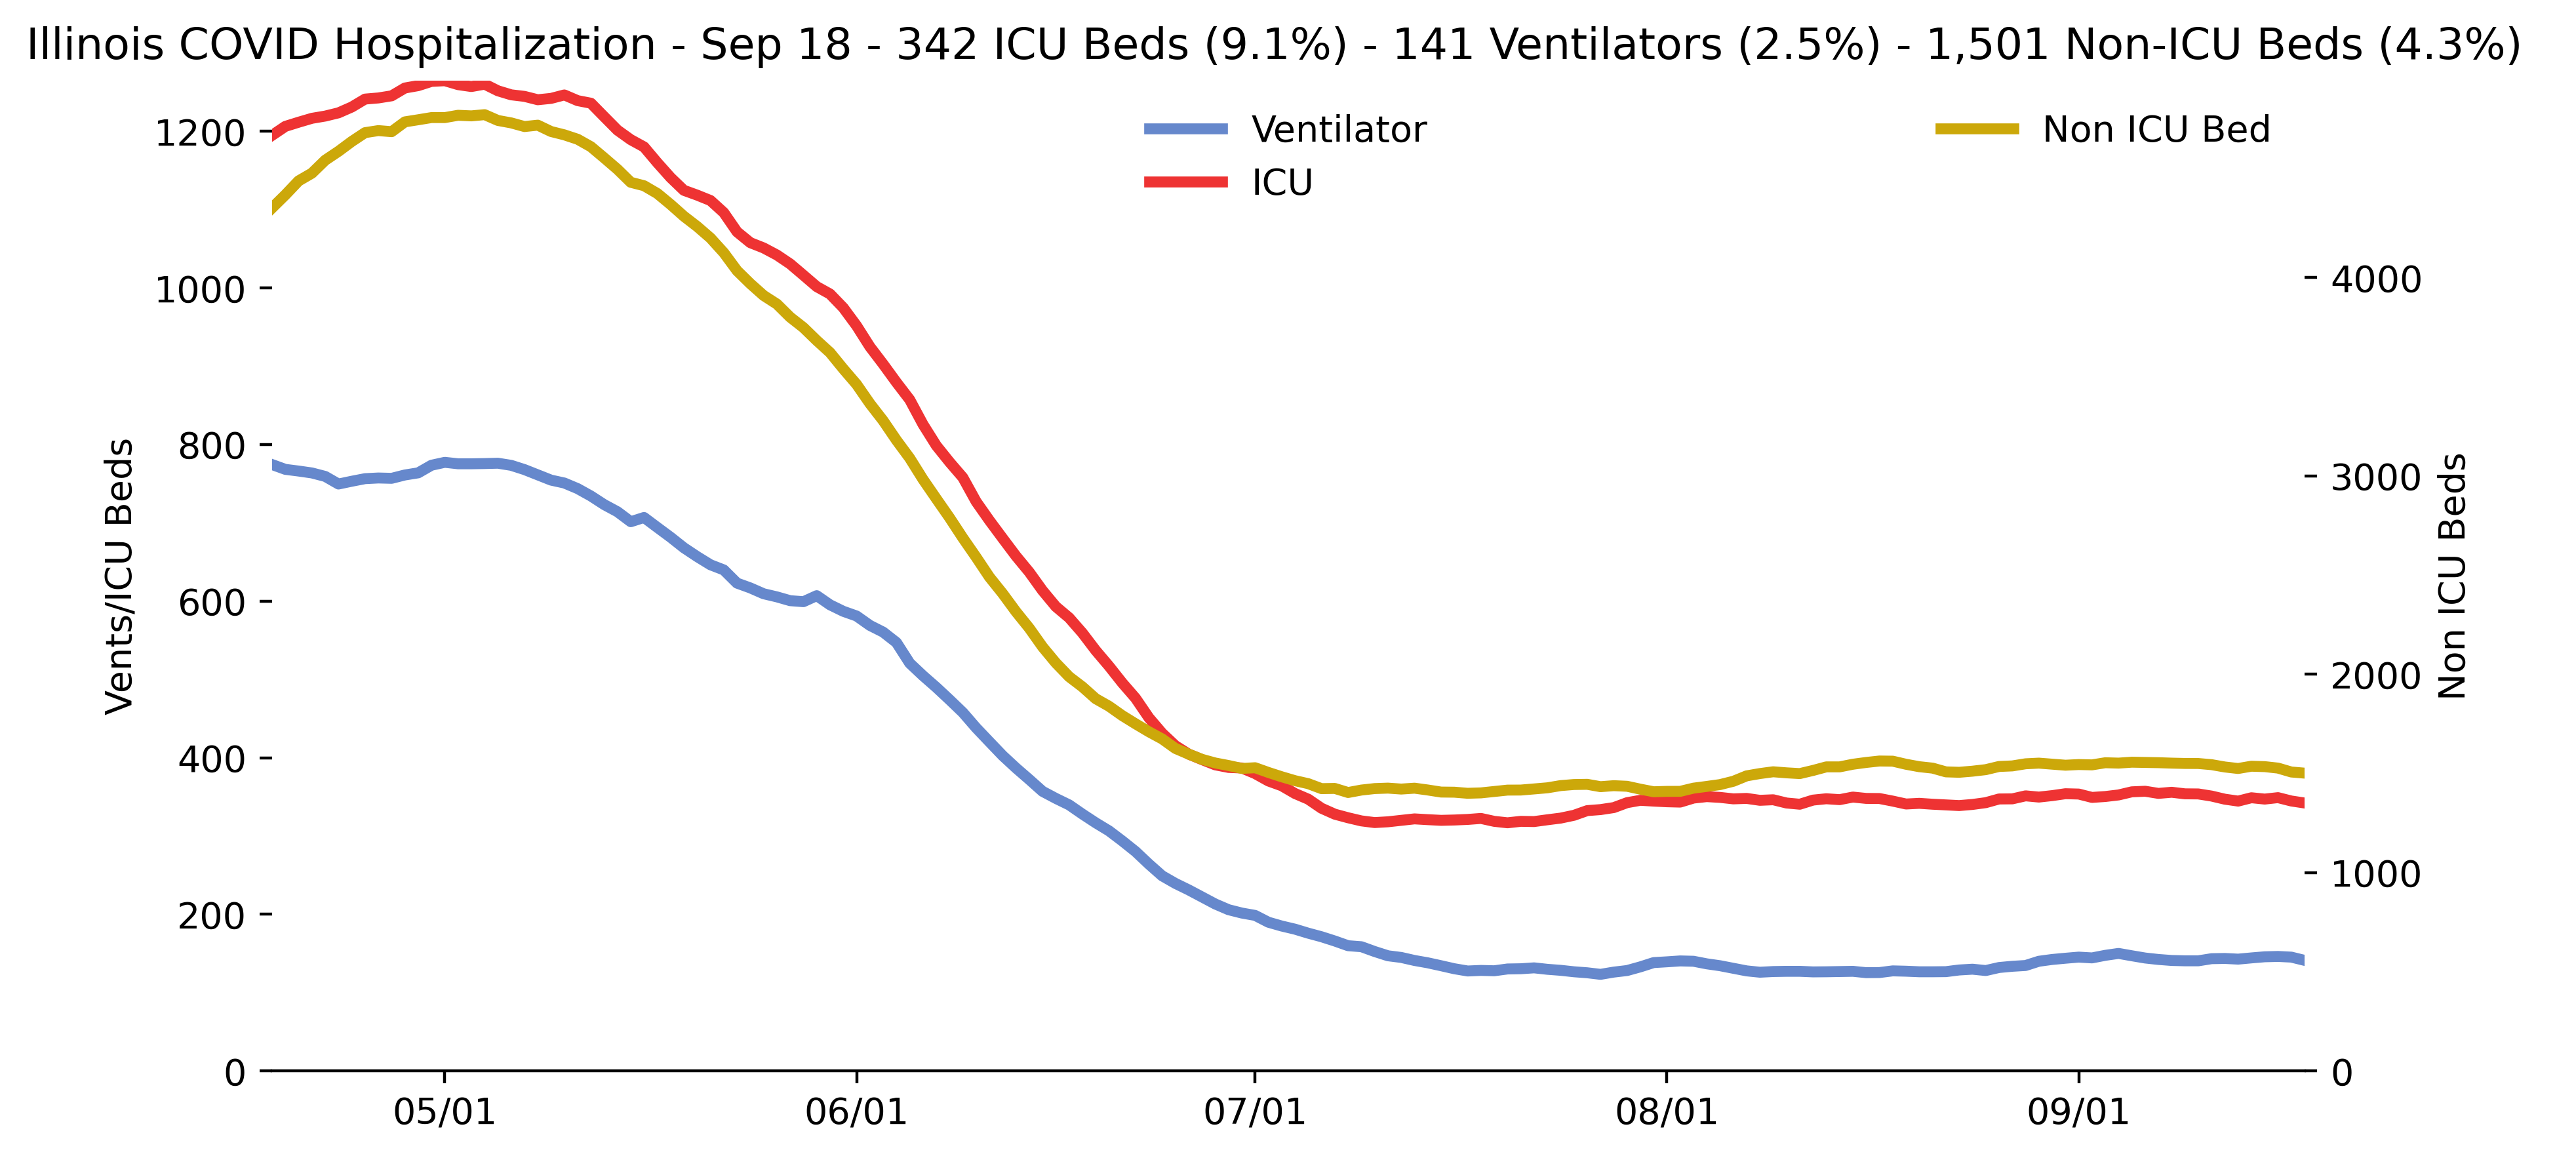

In [144]:

plt.figure(figsize=(10, 5), dpi=400)
plt.box(on=None)
plt.margins(0)
plt.plot(df.index, df['VentilatorInUseCOVID_7day'], color='#6688cc', label="Ventilator", linewidth=3)
plt.plot(df.index, df['ICUInUseBedsCOVID_7day'], color='#EE3333', label="ICU", linewidth=3)
plt.ylabel("Vents/ICU Beds")
plt.ylim(0)
plt.legend(loc=9).get_frame().set_linewidth(0.0)

ax2 = plt.twinx()
ax2.plot(df.index, df['TotalInUseBedsCOVID_7day'], color='#cca80a', label="Non ICU Bed", linewidth=3)
ax2.set_ylim(0)
ax2.set_ylabel("Non ICU Beds")
ax2.margins(0)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.legend(loc='best').set_zorder(10)
ax2.legend().get_frame().set_linewidth(0.0)
vent_value = df.tail(1)['VentilatorInUseCOVID_7day'].values[0]
vent_pct = vent_value / df.tail(1)['VentilatorCapacity_7day'].values[0]
icu_value = df.tail(1)['ICUInUseBedsCOVID_7day'].values[0]
icu_pct = icu_value / df.tail(1)['ICUBeds_7day'].values[0]
bed_value = df.tail(1)['TotalInUseBedsCOVID_7day'].values[0]
bed_pct = bed_value / df.tail(1)['TotalBeds_14day'].values[0]
current_date= df.tail(1)['VentilatorInUseCOVID_7day'].index[0]
plt.title('Illinois COVID Hospitalization - '+'{:%b %-d} - {:,} ICU Beds ({:0.1f}%) - {:,} Ventilators ({:0.1f}%) - {:,} Non-ICU Beds ({:0.1f}%)  '.format(current_date,int(icu_value), 100* icu_pct, int(vent_value), 100*vent_pct, int(bed_value), 100*bed_pct))
plt.grid(axis='y', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d')) 

# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 

plt.savefig('IL Positives.png', bbox_inches='tight')
# plt.close()


In [136]:
'Illinois COVID Hospitalization - {:%b} - {:,} ICU Beds ({:0.1f}%) - {:,} Ventilators ({:0.1f}%) - {:,} Non-ICU Beds ({:0.1f}%)  '.format(current_date,int(icu_value), 100* icu_pct, int(vent_value), 100*vent_pct, int(bed_value), 100*bed_pct)


ValueError: Invalid format specifier

In [108]:
print(current_date,int(icu_value), 100* icu_pct, int(vent_value), 100*vent_pct, int(bed_value), 100*bed_pct)

141.14285714285714 342 9.101964808269678 141 2.4641476493328343 1501 4.327560507613376


In [140]:

df.tail(1)['VentilatorInUseCOVID_7day'].index[0]

Timestamp('2020-09-18 00:00:00')

In [141]:
current_date


numpy.datetime64('2020-09-18T00:00:00.000000000')